In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.EDA

In [173]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


| Признак    | Значение                                   |
| ---------- | ------------------------------------------ |
| `age`      | возраст                                    |
| `sex`      | пол (1 — муж, 0 — жен)                     |
| `cp`       | тип боли в груди (0–3)                     |
| `trestbps` | давление в покое                           |
| `chol`     | холестерин                                 |
| `fbs`      | сахар крови > 120 мг/дл (1 — да, 0 — нет)  |
| `restecg`  | результаты ЭКГ                             |
| `thalach`  | максимальный пульс                         |
| `exang`    | стенокардия при нагрузке (1 — да, 0 — нет) |
| `oldpeak`  | депрессия ST                               |
| `slope`    | наклон ST сегмента                         |
| `ca`       | количество окрашенных сосудов (0–3)        |
| `thal`     | талассемия (1–3)                           |
| `target`   | наличие болезни сердца (1 — да, 0 — нет)   |


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [175]:
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')
df['target'] = df['target'].astype('category')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    int64   
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


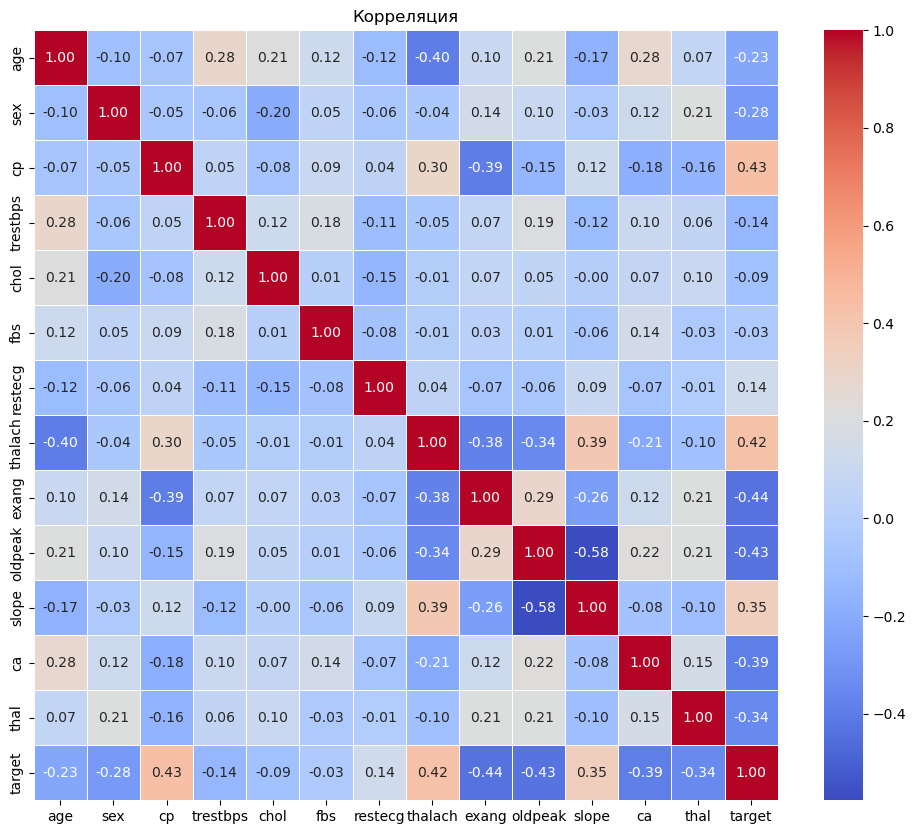

In [177]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Корреляция')
plt.show()

# 2.Preprocessing

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X = df.drop('target', axis=1)
y = df['target']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [182]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 3.Training

## Logisticregression

In [183]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

In [184]:
logreg.fit(X_train_scaler, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [185]:
y_pred_logreg = logreg.predict(X_test_scaler)

In [186]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

In [187]:
def Metric(y_pred, y_test):
    print(f'accuracy_score - {accuracy_score(y_pred, y_test)}')
    print(f'recall_score - {recall_score(y_pred, y_test)}')
    print(f'precision_score - {precision_score(y_pred, y_test)}')
    print(f'f1_score - {f1_score(y_pred, y_test)}')

In [188]:
Metric(y_pred_logreg, y_test)

accuracy_score - 0.8524590163934426
recall_score - 0.8709677419354839
precision_score - 0.84375
f1_score - 0.8571428571428571


## RandomForest

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
random_tree = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42)

In [191]:
random_tree.fit(X_train_scaler, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=42)

In [192]:
y_pred_random = random_tree.predict(X_test_scaler)

In [193]:
Metric(y_pred_random, y_test)

accuracy_score - 0.8688524590163934
recall_score - 0.8529411764705882
precision_score - 0.90625
f1_score - 0.8787878787878788


## Catboost

In [194]:
from catboost import CatBoostClassifier

In [195]:
cat = CatBoostClassifier(iterations=1000, 
                         depth=10, 
                         learning_rate=0.01, 
                         verbose=100, 
                         random_seed=42, 
                         eval_metric='Precision', 
                         metric_period=5, 
                         class_weights={0: 1, 1: 3}, 
                         l2_leaf_reg=9)

In [196]:
cat.fit(X_train_scaler, y_train, eval_set=(X_test_scaler, y_test), use_best_model=True)

0:	learn: 0.8835616	test: 0.8877551	best: 0.8877551 (0)	total: 9.91ms	remaining: 9.9s
100:	learn: 0.9027149	test: 0.9375000	best: 0.9393939 (40)	total: 1.25s	remaining: 11.2s
200:	learn: 0.9322430	test: 0.9375000	best: 0.9393939 (40)	total: 2.99s	remaining: 11.9s
300:	learn: 0.9432624	test: 0.9456522	best: 0.9473684 (240)	total: 4.66s	remaining: 10.8s
400:	learn: 0.9591346	test: 0.9456522	best: 0.9473684 (240)	total: 6.53s	remaining: 9.76s
500:	learn: 0.9661017	test: 0.9456522	best: 0.9473684 (240)	total: 8.7s	remaining: 8.66s
600:	learn: 0.9731707	test: 0.9456522	best: 0.9473684 (240)	total: 11.1s	remaining: 7.34s
700:	learn: 0.9827586	test: 0.9456522	best: 0.9473684 (240)	total: 13.5s	remaining: 5.77s
800:	learn: 0.9876238	test: 0.9456522	best: 0.9473684 (240)	total: 15.4s	remaining: 3.84s
900:	learn: 0.9925373	test: 0.9456522	best: 0.9473684 (240)	total: 17.5s	remaining: 1.92s
999:	learn: 0.9925373	test: 0.9456522	best: 0.9473684 (240)	total: 19.5s	remaining: 0us

bestTest = 0.94736

In [197]:
y_pred_cat = cat.predict(X_test_scaler)

In [198]:
Metric(y_pred_cat, y_test)

accuracy_score - 0.8852459016393442
recall_score - 0.8571428571428571
precision_score - 0.9375
f1_score - 0.8955223880597015


## DecisiontreeClassifier

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [200]:
tree = DecisionTreeClassifier(max_depth=6, random_state=42)

In [201]:
tree.fit(X_train_scaler, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [202]:
y_pred_tree = tree.predict(X_test_scaler)

In [203]:
Metric(y_pred_tree, y_test)

accuracy_score - 0.8360655737704918
recall_score - 0.8666666666666667
precision_score - 0.8125
f1_score - 0.8387096774193549


## SVC

In [214]:
from sklearn.svm import SVC

In [215]:
svc = SVC(kernel= 'poly', random_state=42, probability=True)

In [216]:
svc.fit(X_train_scaler, y_train)

SVC(kernel='poly', probability=True, random_state=42)

In [217]:
y_pred_svc = svc.predict(X_test_scaler)

In [218]:
Metric(y_pred_svc, y_test)

accuracy_score - 0.9016393442622951
recall_score - 0.90625
precision_score - 0.90625
f1_score - 0.90625


In [209]:
print(classification_report(y_test, y_pred_stack, digits=3))

              precision    recall  f1-score   support

           0      0.893     0.862     0.877        29
           1      0.879     0.906     0.892        32

    accuracy                          0.885        61
   macro avg      0.886     0.884     0.885        61
weighted avg      0.885     0.885     0.885        61



In [219]:
import pickle

with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(svc, file)

## XGboost

In [124]:
from xgboost import XGBClassifier

## Stacking

In [70]:
from sklearn.ensemble import StackingClassifier

In [103]:
estimators = [('cat', cat),
              ('logreg', logreg),
              ('svc', svc)]
stack = StackingClassifier(
    estimators=estimators,
    final_estimator= LogisticRegression(),
    stack_method='predict_proba',
    passthrough=False,
    n_jobs=-1,
    verbose=100
)

In [104]:
stack.fit(X_train_scaler, y_train)

StackingClassifier(estimators=[('cat',
                                <catboost.core.CatBoostClassifier object at 0x000001FFFCEA1880>),
                               ('logreg',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('svc',
                                SVC(kernel='poly', probability=True,
                                    random_state=42))],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   stack_method='predict_proba', verbose=100)

In [105]:
y_pred_stack = stack.predict(X_test_scaler)

In [164]:
print(classification_report(y_test, y_pred_stack, digits=3))

              precision    recall  f1-score   support

           0      0.893     0.862     0.877        29
           1      0.879     0.906     0.892        32

    accuracy                          0.885        61
   macro avg      0.886     0.884     0.885        61
weighted avg      0.885     0.885     0.885        61



In [160]:
print("Recall:", recall_score(y_test, y_pred_stack))

Recall: 0.90625


In [161]:
Metric(y_pred_stack, y_test)

accuracy_score - 0.8852459016393442
recall_score - 0.8787878787878788
precision_score - 0.90625
f1_score - 0.8923076923076924


## Stacking-2

In [137]:
cat2 = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    random_strength=0.8,
    class_weights={0:1, 1:3},  # усиливаем recall
    eval_metric='Recall',
    verbose=0
)

In [152]:
xgb = XGBClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=2,
    scale_pos_weight=3,   # аналог class_weights
)

In [153]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    class_weight={0:1, 1:3},
    random_state=42
)

In [166]:
estimators2 = [
    ('cat', cat2),
    ('xgb', xgb),
    ('rf', rf)
]

stack2 = StackingClassifier(
    estimators=estimators2,
    final_estimator=LogisticRegression(C=0.5, max_iter=1000),
    stack_method='predict_proba',
    n_jobs=-1,
    passthrough=False
)


In [170]:
stack2.fit(X_train_scaler, y_train)

StackingClassifier(estimators=[('cat',
                                <catboost.core.CatBoostClassifier object at 0x000001FF87A077A0>),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_pol...
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=800, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf',
                                RandomForestClassifier(class_weight={0: 1,
                                                                     1: 3},
                                                       max_depth=10,
                                                       min_samples_split=5,
                                                       n_estimators=300,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(C=0.5, max_iter=1000),
                   n_jobs=-1, stack_method='predict_proba')

In [171]:
y_pred_stack2 = stack2.predict(X_test_scaler)

In [157]:
print(classification_report(y_test, y_pred_stack2, digits=3))

              precision    recall  f1-score   support

           0      0.862     0.862     0.862        29
           1      0.875     0.875     0.875        32

    accuracy                          0.869        61
   macro avg      0.869     0.869     0.869        61
weighted avg      0.869     0.869     0.869        61



In [159]:
print("Recall:", recall_score(y_test, y_pred_stack2))


Recall: 0.875
